## importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## import the data

In [2]:
df= pd.read_csv('/kaggle/input/naive-bayes/NaiveBayes.csv')

In [3]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.shape

(400, 3)

In [7]:
df.isna().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [8]:
df.describe()

,Age,Salary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

## Training the model

In [11]:
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(X_train, y_train)

# testing the model
y_pred = classifer.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.68


In [13]:
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
classifer1 = GaussianNB()

# training the model
classifer1.fit(X_train, y_train)

# testing the model
y_pred1 = classifer1.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred1))

0.9


## Evaluating

<Axes: >

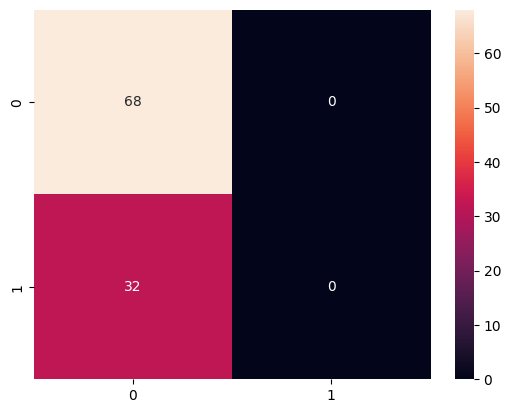

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
#plt.savefig('confusion.png')

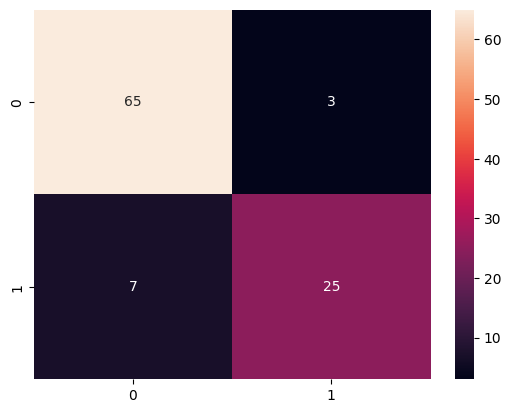

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm,annot=True)
plt.savefig('confusion1.png')

In [17]:
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [18]:
from sklearn import preprocessing
labelCode = preprocessing.LabelEncoder()
wheather_encoded =labelCode.fit_transform(weather)

In [19]:
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [20]:
from sklearn import preprocessing
labelCode = preprocessing.LabelEncoder()
label=labelCode.fit_transform(play)

In [21]:
weather_2d = np.reshape(wheather_encoded, (-1, 1))

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(weather_2d, label)

GaussianNB()

In [23]:
predicted= model.predict([[0]]) # 0:Overcast
predicted

array([1])